In [1260]:
# to handle datasets
import pandas as pd
import numpy as np
import re
import time

# importing the requests library 
import requests 

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler


# for Q-Q plots
import pylab
import scipy.stats as stats

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [1261]:
# load dataset
df = pd.read_csv ('treb_history.txt', delimiter = '\t') # RealJaJa Dataset

print(df.shape)

# visualise the dataset
df.head(2)

(653171, 36)


,Unnamed: 0,id,type,province,community,postcode,bedrooms,bedroomplus,washrooms,kitchens,bedroomstotal,propertytype,approxage,approxsqft,price,soldprice,laststatus,mlsnumber,brokeragename,contractdate,solddate,closeddate,terminateddate,entrydate,updatedtimestamp,propertynew,city,crossstreets,maintenancefee,area,fronton,longitude,latitude,coop,sprice,lprice
0,0,"{""$oid"":""59dd1c1519bd90351291bbd8""}",Sale,Ontario,Willowdale East,M2N6X5,1.0,NaN,1.0,1.0,1,Condo Apt,NaN,600-699,300000.0,NaN,Sus,C3160165,"CENTURY 21 PERCY FULTON LTD., BROKERAGE",2015-04-07,NaN,NaN,NaN,2015-04-07,2018-03-13 05:56:39,Condo,Toronto,Yonge/Finch,341.81,Toronto,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"{""$oid"":""59d526eba219a85352c2fd10""}",Sale,Ontario,Niagara,M5V1B2,2.0,NaN,2.0,1.0,2,Condo Apt,6-10,800-899,436800.0,NaN,Ter,C3240681,"CENTURY 21 LEADING EDGE REALTY INC., BROKERAGE",2015-06-22,NaN,NaN,2015-09-19,2015-06-22,2018-03-13 05:56:39,Condo,Toronto,Bathurst / Lakeshore,511.00,Toronto,NaN,NaN,NaN,NaN,NaN,NaN


In [1262]:
df.dtypes

Unnamed: 0            int64
id                   object
type                 object
province             object
community            object
postcode             object
bedrooms            float64
bedroomplus         float64
washrooms           float64
kitchens            float64
bedroomstotal         int64
propertytype         object
approxage            object
approxsqft           object
price               float64
soldprice           float64
laststatus           object
mlsnumber            object
brokeragename        object
contractdate         object
solddate             object
closeddate           object
terminateddate       object
entrydate            object
updatedtimestamp     object
propertynew          object
city                 object
crossstreets         object
maintenancefee      float64
area                 object
fronton              object
longitude           float64
latitude            float64
coop                 object
sprice              float64
lprice              

# Data Analysis and Basic Cleaning

In [1263]:
# list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>1]

d={}

# rounding missing values to three decimal places
for var in vars_with_na:
    d[var]= np.round(df[var].isnull().mean(), 3)

#Sorting missing values in DESC manner

sd= (sorted(d.items(), key =lambda kv:(kv[1], kv[0]), reverse= True))

sd
 

[('longitude', 0.895),
 ('latitude', 0.895),
 ('lprice', 0.785),
 ('maintenancefee', 0.772),
 ('terminateddate', 0.734),
 ('bedroomplus', 0.597),
 ('sprice', 0.589),
 ('approxage', 0.558),
 ('fronton', 0.398),
 ('closeddate', 0.379),
 ('soldprice', 0.373),
 ('solddate', 0.373),
 ('coop', 0.371),
 ('approxsqft', 0.318),
 ('kitchens', 0.006),
 ('bedrooms', 0.006),
 ('postcode', 0.001),
 ('washrooms', 0.0),
 ('province', 0.0),
 ('propertytype', 0.0),
 ('crossstreets', 0.0),
 ('community', 0.0)]

In [1264]:
df.columns

Index(['Unnamed: 0', 'id', 'type', 'province', 'community', 'postcode',
       'bedrooms', 'bedroomplus', 'washrooms', 'kitchens', 'bedroomstotal',
       'propertytype', 'approxage', 'approxsqft', 'price', 'soldprice',
       'laststatus', 'mlsnumber', 'brokeragename', 'contractdate', 'solddate',
       'closeddate', 'terminateddate', 'entrydate', 'updatedtimestamp',
       'propertynew', 'city', 'crossstreets', 'maintenancefee', 'area',
       'fronton', 'longitude', 'latitude', 'coop', 'sprice', 'lprice'],
      dtype='object')

In [1265]:
df['city'].nunique() # Records for total 50 cities

50

In [1266]:
a=df['city'].unique()

In [1267]:
df[(df.city=='Toronto C15') | (df.city=='Toronto E02')].shape[0]

2

In [1268]:
cols=['postcode','province','city','area','community','type','approxage','approxsqft','propertynew','bedroomstotal','kitchens','washrooms','maintenancefee','entrydate','solddate','soldprice','latitude','longitude']

In [1269]:
df=df[cols]

In [1270]:
df.head(1)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,entrydate,solddate,soldprice,latitude,longitude
0,M2N6X5,Ontario,Toronto,Toronto,Willowdale East,Sale,NaN,600-699,Condo,1,1.0,1.0,341.81,2015-04-07,NaN,NaN,NaN,NaN


In [1271]:
df.shape

(653171, 18)

In [1272]:
df['type'].unique()

array(['Sale', 'Lease'], dtype=object)

In [1273]:
df=df[df['type']=='Sale'] # ONLY Taking Properties for SALE for price prediction

In [1274]:
df['type'].unique()

array(['Sale'], dtype=object)

In [1275]:
df.shape

(452566, 18)

In [1276]:
df['postcode'].nunique()

91096

In [1277]:
#df['postcode'].head(1000)

## PostCode Cleaning

In [1278]:
    df['postcode'] = df['postcode'].str.upper()
    df['postcode'] = df['postcode'].str.replace(' ', '')
    df['postcode'] = df['postcode'].str.replace('-', '')
    df=df[df['postcode'].str.len()==6] # POSTCODE in CANADA consists of 6 digits

In [1279]:
df['postcode'].nunique()

73215

In [1280]:
# POSTCODE of ONTARIO starts with any of  K,L,M,N,P[ 6 digits and alternate Letters and Numbers]

In [1281]:
df=df[df['postcode'].str.contains('^[KLMNP]{1}[0-9]{1}[a-zA-Z]{1}[- ]{0,1}[0-9]{1}[a-zA-Z]{1}[0-9]{1}',regex=True)]

In [1282]:
df['postcode'].nunique()

72216

In [1283]:
df['city'].nunique() # Has records for all 50 cities

50

In [1284]:
df.head(1)
df.shape

(448730, 18)

In [1285]:
df['province']='Ontario' # The province is only ON< Flat missing values imputation>

In [1286]:
df.head(1)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,entrydate,solddate,soldprice,latitude,longitude
0,M2N6X5,Ontario,Toronto,Toronto,Willowdale East,Sale,NaN,600-699,Condo,1,1.0,1.0,341.81,2015-04-07,NaN,NaN,NaN,NaN


In [1287]:
df.shape

(448730, 18)

In [1288]:
#col2=['city','area','community','type','approxsqft','propertynew','entrydate','solddate']

In [1289]:
#df.dropna(subset=col2)

## Numerical Variables

In [1290]:
# list of numerical variables
num_vars = [var for var in df.columns if df[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
df[num_vars].head()

Number of numerical variables:  7


,bedroomstotal,kitchens,washrooms,maintenancefee,soldprice,latitude,longitude
0,1,1.0,1.0,341.81,NaN,NaN,NaN
1,2,1.0,2.0,511.00,NaN,NaN,NaN
2,5,1.0,3.0,NaN,NaN,NaN,NaN
3,2,1.0,2.0,935.00,NaN,NaN,NaN
4,2,1.0,2.0,516.00,NaN,NaN,NaN


### Discrete Numerical Variables

In [1291]:
#  list of discrete variables ## changing cutoff from 20 to 36 based ob the no. of washrooms
discrete_vars = [var for var in num_vars if len(df[var].unique())<36]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  3


In [1292]:
# let's visualise the discrete variables
df[discrete_vars].sort_values(by='washrooms',ascending=False).head()

,bedroomstotal,kitchens,washrooms
513552,18,9.0,35.0
232359,18,9.0,27.0
112864,0,0.0,27.0
110960,18,9.0,24.0
578358,0,0.0,24.0


In [1316]:
df['washrooms'].unique() # 35 washrooms looks too much

array([ 1.,  2.,  3.,  5., 12.,  4.,  6.,  7.,  9.,  8.,  0., 10., 14.,
       11., 16., 13., 18., 15., 24., 27., nan, 17., 35.])

In [1298]:
df[df['washrooms']>4][['postcode','city','washrooms','approxsqft']].sort_values(by='washrooms',ascending=False).head(7)

,postcode,city,washrooms,approxsqft
513552,M6K2J6,Toronto,35.0,5000+
112864,M5R1W8,Toronto,27.0,NaN
232359,M4J2L1,Toronto,27.0,NaN
110960,M4Y2G6,Toronto,24.0,NaN
578358,M6K2H9,Toronto,24.0,5000+
35032,M5A2A5,Toronto,18.0,5000+
59740,M5A2A5,Toronto,18.0,5000+


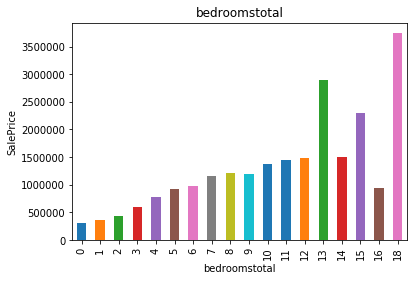

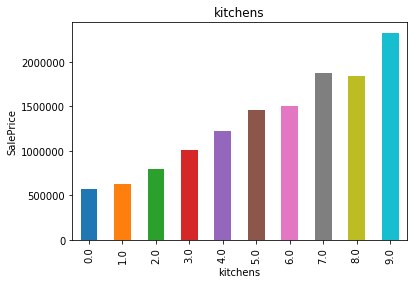

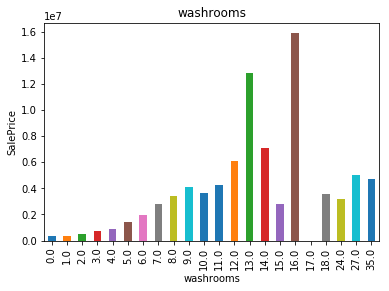

In [1213]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['soldprice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(df, var)

In [1214]:
#### No monotonic relation found

### Continuous Numerical Variables

In [1215]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  4


In [1216]:
df[cont_vars].head()

,maintenancefee,soldprice,latitude,longitude
0,341.81,NaN,NaN,NaN
1,511.00,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,935.00,NaN,NaN,NaN
4,516.00,NaN,NaN,NaN


In [1217]:
l2=['latitude','longitude']

In [1218]:
cont_vars= [x for x in cont_vars if x not in l2]

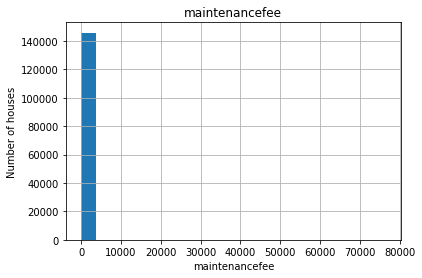

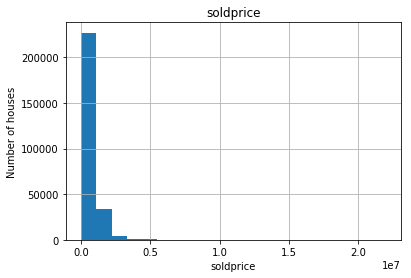

In [1219]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(df, var)

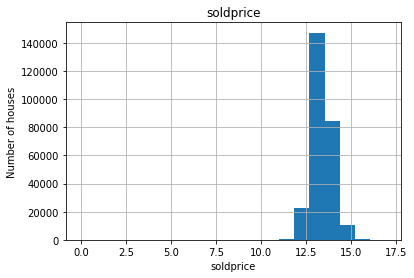

In [1220]:
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in cont_vars:
    analyse_transformed_continous(df, var)

In [1221]:
# become a Gaussian Distribution

In [1222]:
df.head(1)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,entrydate,solddate,soldprice,latitude,longitude
0,M2N6X5,Ontario,Toronto,Toronto,Willowdale East,Sale,NaN,600-699,Condo,1,1.0,1.0,341.81,2015-04-07,NaN,NaN,NaN,NaN


## Outlier detection for Continious Numerical Variable

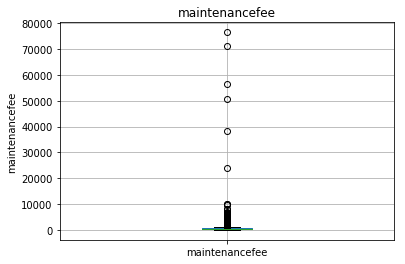

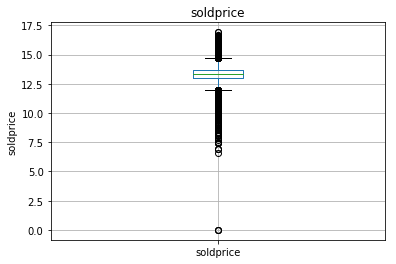

In [1223]:
# let's make boxplots to visualise outliers in the continuous variables 

def find_outliers(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[var].unique():
        df[var] = df[var]
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
    
for var in cont_vars:
    find_outliers(df, var)

In [1224]:
col2=['soldprice','maintenancefee'] #  sns does not take var with NaN

In [1225]:
df1=df[(df['soldprice'].isnull()==False) & (df['maintenancefee'].isnull()==False)]

In [1226]:
def diagnostic_plots_outliers(df, variable):

    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[variable].unique():
        #df[variable]=df[variable]
        pass
    else:
        # log transform the variable
        df[variable] = np.log(df[variable])

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
    
    
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.ylabel('RM quantiles')   
    

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\Parijat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


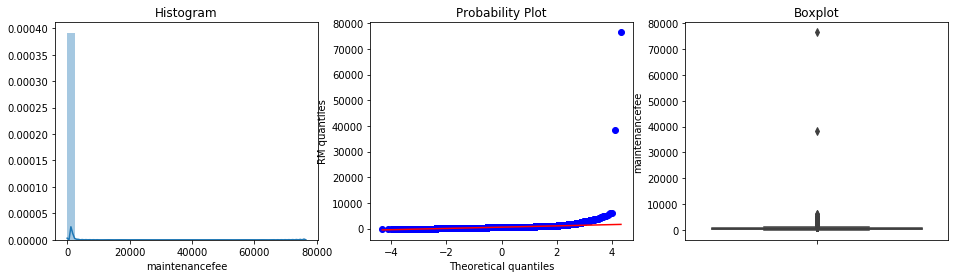

C:\Users\Parijat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


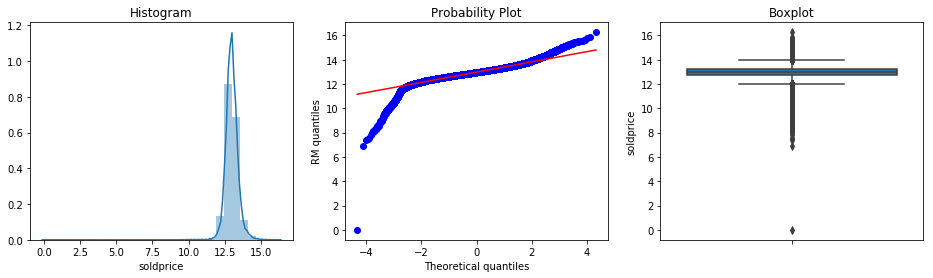

In [1227]:
for var in cont_vars:
    diagnostic_plots_outliers(df1, var)

In [1228]:
type(df1)

pandas.core.frame.DataFrame

## Categorical Variables

In [1229]:
### Categorical variables

cat_vars = [var for var in df.columns if df[var].dtypes=='O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  11


In [1230]:
df[cat_vars].head(1)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,entrydate,solddate
0,M2N6X5,Ontario,Toronto,Toronto,Willowdale East,Sale,NaN,600-699,Condo,2015-04-07,NaN


# Time Variables 

In [1231]:
time_vars = [var for var in cat_vars if 'date' in var]

time_vars

['entrydate', 'solddate']

In [1232]:
#df.drop('tim',axis=1).head(1)

In [1233]:
df.shape

(448730, 18)

## Cleaning for time variables

In [1234]:
#df[(df['entrydate'].isnull()==True) & (df['solddate'].isnull()==True)].shape[0]

In [1235]:
#df= df[(df['entrydate'].isnull()==False) | (df['solddate'].isnull()==False)] 
# Imputation is not possible for time variables

In [1236]:
df= df[df['solddate'].isnull()==False] 
# Imputation is not possible for time variables

In [1237]:
#df['sloddate']=pd.to_datetime(df['solddate'], format='%Y-%m-%d')

In [1238]:
df['YM']=pd.to_datetime(df['solddate'], format='%Y-%m-%d').dt.to_period('M').astype(str)

In [1239]:
df[df.solddate.isnull()==True].head(3)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,entrydate,solddate,soldprice,latitude,longitude,YM


In [1240]:
type(df['YM'])

pandas.core.series.Series

In [1241]:
 listYearMonth = df.sort_values(['YM'])['YM'].unique()

In [1242]:
listYearMonth

array(['2003-10', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01',
       '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07',
       '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01',
       '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
       '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
       '2018-02', '2018-03', '2018-04', '2018-05', '2018-06'],
      dtype=object)

In [1243]:
TrainMonth= listYearMonth[-6:] # taking last 6 monts data only

In [1244]:
TrainMonth

array(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06'],
      dtype=object)

In [1245]:
df = df.loc[df['YM'].isin(TrainMonth)]

In [1246]:
df.head(1)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,entrydate,solddate,soldprice,latitude,longitude,YM
116274,M5V0C4,Ontario,Toronto,Toronto,Waterfront Communities C1,Sale,0-5,900-999,Condo,3,1.0,2.0,536.53,2017-07-27,2018-03-09,880000.0,43.646,-79.3899,2018-03


In [1247]:
df['city'].nunique()

35

In [1248]:
#df['lifeofadXX'] = pd.to_datetime(df['solddate'].max(),format='%Y-%m-%d').dt.days - pd.to_datetime(df['solddate'],format='%Y-%m-%d').dt.days # Creating Feature 

In [1254]:
    df['lifeofad'] = (pd.to_datetime(df['solddate'],format='%Y-%m-%d') - pd.to_datetime(df['entrydate'],format='%Y-%m-%d')).dt.days # Creating Feature 

    # Feature Creation 'lifeofad'
    
    df=df[df['lifeofad']<=180] # only houses that are sold within 180 days of AD posting


In [1255]:
df.head(1)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,entrydate,solddate,soldprice,latitude,longitude,YM,lifeofad
122817,M2P1S4,Ontario,Toronto,Toronto,St. Andrew-Windfields,Sale,NaN,3500-5000,Detached,5,1.0,6.0,NaN,2017-09-07,2018-01-29,3250000.0,43.7568,-79.4012,2018-01,144


In [1258]:
df.shape

(39548, 20)

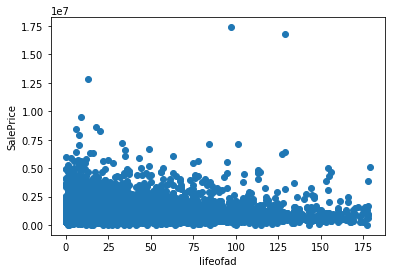

In [1256]:
plt.scatter(df['lifeofad'], df['soldprice'])
plt.ylabel('SalePrice')
plt.xlabel('lifeofad')
plt.show()



Text(0.5,1,'Change in House price with ADLife')

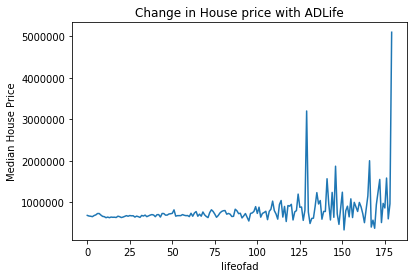

In [1257]:
df.groupby('lifeofad')['soldprice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in House price with ADLife')

# Categorical Variables (Continued)

In [445]:
#l3=['entrydate','solddate',]

In [446]:
cat_vars=[x for x in cat_vars if x not in time_vars]

In [447]:
df[cat_vars].head(1)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew
27,M4Y1W4,Ontario,Toronto,Toronto,Bay Street Corridor,Sale,0-5,800-899,Condo


In [448]:
df['approxage'].value_counts()

0-5       30175
6-15      21771
16-30     19463
31-50     13634
51-99      9134
New        7467
6-10       6904
11-15      3690
100+       2555
15-Jun      147
10-Jun       10
15-Nov        9
Name: approxage, dtype: int64

In [449]:
df['approxsqft'].value_counts()

1500-2000    24519
2000-2500    17727
1000-1199    14315
600-699      14256
1100-1500    13087
1200-1399    12484
2500-3000    12107
700-799      10746
800-899       9360
900-999       8934
500-599       8032
3000-3500     7387
1400-1599     5908
3500-5000     5177
700-1100      3016
1600-1799     2771
0-499         2532
1800-1999     1477
5000+         1132
2000-2249      783
2250-2499      398
2500-2749      159
2750-2999      119
< 700           98
3250-3499       55
3000-3249       50
3500-3749       21
500-699         20
900-1099        20
700-899         16
4000-4249       12
1100-1299       11
4250-4499       10
3750-3999        6
1300-1499        6
4750-4999        2
4500-4749        1
Name: approxsqft, dtype: int64

## Rare labels in Categorical Variable(fraction<0.01 of total no of labels)

In [450]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['soldprice'].count() / len(df)
    return tmp[tmp<rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(df, var, 0.01))
    print()

postcode
K0K1X0    0.000004
K0M1K0    0.000004
K0M2C0    0.000004
K0M2J0    0.000008
K1K0H9    0.000008
K5B0L2    0.000004
K5N6W3    0.000004
K6H1J1    0.000004
K6H5R6    0.000004
K7S3G8    0.000008
K8P5J6    0.000004
K8P5M9    0.000004
K9V4M6    0.000004
L0A1A0    0.000004
L0A1E0    0.000019
L0A1J0    0.000087
L0A1K0    0.000008
L0B1A0    0.000215
L0B1A4    0.000004
L0B1B0    0.000325
L0B1C0    0.000121
L0B1E0    0.000257
L0B1J0    0.000178
L0B1K0    0.000083
L0B1L0    0.000219
L0B1M0    0.000231
L0B1N0    0.000030
L0B2K0    0.000004
L0C0V1    0.000004
L0C1A0    0.000223
            ...   
N3T5I6    0.000004
N3T5L4    0.000008
N3T5L6    0.000004
N3T5L7    0.000008
N3T5L9    0.000004
N3T5M1    0.000004
N3T6G4    0.000004
N3T6M3    0.000004
N3T6M4    0.000004
N3T6N9    0.000004
N3T6P3    0.000004
N3T6P8    0.000004
N3T6R4    0.000004
N3T6R6    0.000004
N3T6S5    0.000004
N3T6T5    0.000004
N3Y1H4    0.000004
N4E2H2    0.000004
N4N7M6    0.000004
N4N8T2    0.000004
N4W3S8    0.000004
N5B

In [451]:
cat_vars=['city','approxage','approxsqft','propertynew'] # choosing variables to show realtion with sold price

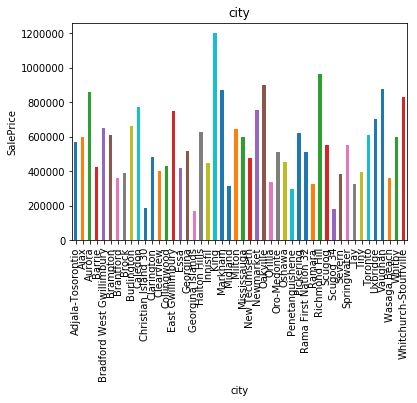

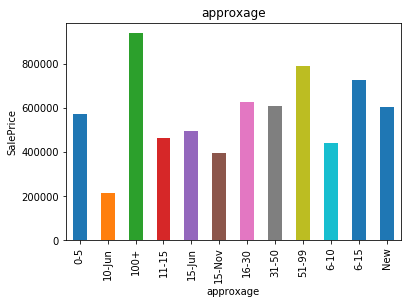

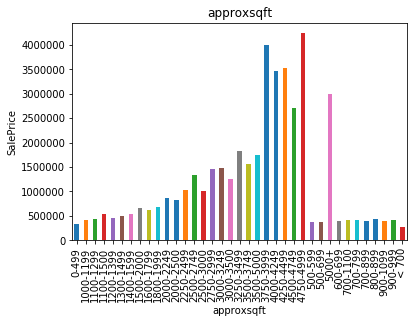

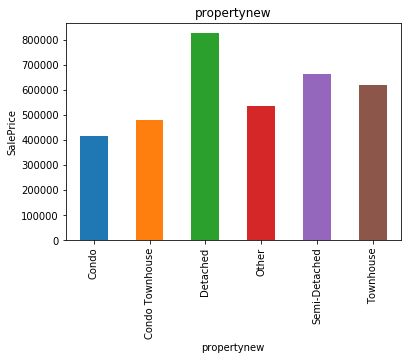

In [452]:
for var in cat_vars:
    analyse_discrete(df, var)

In [453]:
### Modifying Categorical Variable 'approxage' (Putting Similar logic)

In [457]:
df['city'].nunique()

48

In [458]:
#df['approxage'].replace(to_replace='15-Nov', value='11-15')

In [459]:
df.loc[df.approxage=='15-Nov','approxage']='11-15'

In [461]:
df.loc[df.approxage=='15-Jun','approxage']='6-15'

In [463]:
df.loc[df.approxage=='10-Jun','approxage']='6-10'

In [464]:
df['approxage'].value_counts()

0-5      30175
6-15     21918
16-30    19463
31-50    13634
51-99     9134
New       7467
6-10      6914
11-15     3699
100+      2555
Name: approxage, dtype: int64

In [465]:
#df['approxsqft'].value_counts()

In [466]:
df.shape

(264528, 19)

In [467]:
#df.loc[df['city']=='6-15']

In [468]:
#df[df.approxage.isnull()==True] # Lost records for 2 cities

In [469]:
b=df['city'].unique()

In [470]:
amb=[x for x in a if x not in b]

In [471]:
amb

['Toronto C15', 'Toronto E02']

In [472]:
df.head(2)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,entrydate,solddate,soldprice,latitude,longitude,ageoflisting
27,M4Y1W4,Ontario,Toronto,Toronto,Bay Street Corridor,Sale,0-5,800-899,Condo,2,1.0,2.0,832.69,2015-07-10,2015-10-10,520000.0,NaN,NaN,92.0
33,M5E1A1,Ontario,Toronto,Toronto,Waterfront Communities C8,Sale,NaN,0-499,Condo,1,1.0,1.0,187.40,2015-07-11,2015-10-06,260000.0,NaN,NaN,87.0


In [473]:
df.drop(['entrydate','solddate'],axis=1, inplace=True)

In [474]:
df.columns

Index(['postcode', 'province', 'city', 'area', 'community', 'type',
       'approxage', 'approxsqft', 'propertynew', 'bedroomstotal', 'kitchens',
       'washrooms', 'maintenancefee', 'soldprice', 'latitude', 'longitude',
       'ageoflisting'],
      dtype='object')

In [475]:
df.dtypes

postcode           object
province           object
city               object
area               object
community          object
type               object
approxage          object
approxsqft         object
propertynew        object
bedroomstotal       int64
kitchens          float64
washrooms         float64
maintenancefee    float64
soldprice         float64
latitude          float64
longitude         float64
ageoflisting      float64
dtype: object

In [476]:
df.head(2)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,soldprice,latitude,longitude,ageoflisting
27,M4Y1W4,Ontario,Toronto,Toronto,Bay Street Corridor,Sale,0-5,800-899,Condo,2,1.0,2.0,832.69,520000.0,NaN,NaN,92.0
33,M5E1A1,Ontario,Toronto,Toronto,Waterfront Communities C8,Sale,NaN,0-499,Condo,1,1.0,1.0,187.40,260000.0,NaN,NaN,87.0


In [477]:
df.shape

(264528, 17)

In [478]:
# saving a copy of mostly filtered data before adding env vars

In [479]:
df.to_csv('df_wo_env.csv',index=False)

# Env Vars Addition

In [480]:
df.columns.values

array(['postcode', 'province', 'city', 'area', 'community', 'type',
       'approxage', 'approxsqft', 'propertynew', 'bedroomstotal',
       'kitchens', 'washrooms', 'maintenancefee', 'soldprice', 'latitude',
       'longitude', 'ageoflisting'], dtype=object)

In [481]:
#env_cols=['hospital','supermarket','gas_station','transit_station','veterinary_care','fire_station',\
         # 'shopping_mall','police','pharmacy','movie_theater','airport','lawyer','liquor_store','bank','school']

In [482]:
env_cols_ss=['hospital','supermarket','bank','shopping_mall','school']

In [483]:
# a subset has been taken to cut down quering cost

In [484]:
len(env_cols_ss) 

5

In [485]:
# of 'geocode' + 'near places' google queries

In [486]:
df.shape[0] + df.shape[0]*len(env_cols_ss) 

1587168

In [487]:
for i in env_cols_ss:
    df[i]=np.nan

In [488]:
df.head(2)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,soldprice,latitude,longitude,ageoflisting,hospital,supermarket,bank,shopping_mall,school
27,M4Y1W4,Ontario,Toronto,Toronto,Bay Street Corridor,Sale,0-5,800-899,Condo,2,1.0,2.0,832.69,520000.0,NaN,NaN,92.0,NaN,NaN,NaN,NaN,NaN
33,M5E1A1,Ontario,Toronto,Toronto,Waterfront Communities C8,Sale,NaN,0-499,Condo,1,1.0,1.0,187.40,260000.0,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN


In [489]:
df.reset_index(drop=True,inplace=True)

In [490]:
df.head(2)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,soldprice,latitude,longitude,ageoflisting,hospital,supermarket,bank,shopping_mall,school
0,M4Y1W4,Ontario,Toronto,Toronto,Bay Street Corridor,Sale,0-5,800-899,Condo,2,1.0,2.0,832.69,520000.0,NaN,NaN,92.0,NaN,NaN,NaN,NaN,NaN
1,M5E1A1,Ontario,Toronto,Toronto,Waterfront Communities C8,Sale,NaN,0-499,Condo,1,1.0,1.0,187.40,260000.0,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN


In [491]:
# code to find numeric col # of postcode for any df

In [492]:
df_list= list(df.columns.values)
df_list

['postcode',
 'province',
 'city',
 'area',
 'community',
 'type',
 'approxage',
 'approxsqft',
 'propertynew',
 'bedroomstotal',
 'kitchens',
 'washrooms',
 'maintenancefee',
 'soldprice',
 'latitude',
 'longitude',
 'ageoflisting',
 'hospital',
 'supermarket',
 'bank',
 'shopping_mall',
 'school']

In [493]:
d1={}

In [494]:
for i, e in enumerate(df_list,start=0):
    d1[e]=i

In [495]:
d1 # ix can be used instead

{'postcode': 0,
 'province': 1,
 'city': 2,
 'area': 3,
 'community': 4,
 'type': 5,
 'approxage': 6,
 'approxsqft': 7,
 'propertynew': 8,
 'bedroomstotal': 9,
 'kitchens': 10,
 'washrooms': 11,
 'maintenancefee': 12,
 'soldprice': 13,
 'latitude': 14,
 'longitude': 15,
 'ageoflisting': 16,
 'hospital': 17,
 'supermarket': 18,
 'bank': 19,
 'shopping_mall': 20,
 'school': 21}

In [496]:
df.index.max()

264527

In [358]:
df.index.min()

0

In [497]:
type(df.iloc[0,0])

str

In [498]:
df.shape

(264528, 22)

In [499]:
d1['postcode']

0

In [500]:
range(0,df.shape[0]+1)

range(0, 264529)

## Getting correct lat/longs using Google geocoding API

In [521]:
tick=time.time()

d4=[]
d5={}

for k in range(0,df.shape[0]+1):
    
    .
    postcode= df.iloc[k,d1['postcode']]

    # api-endpoint 
    URL = 'https://maps.googleapis.com/maps/api/geocode/json'

    # location given here 
    location = postcode

    # defining a params dict for the parameters to be sent to the API 
    PARAMS = {'address':location, 'key':'Key'} 

    # sending get request and saving the response as response object 
    r = requests.get(url = URL, params = PARAMS) 

    # extracting data2 in json format 
    data2 = r.json()
    
    if data2['status']=='OK':
        # extracting latitude, longitude and formatted address 
        # of the first matching location 
        latitude = data2['results'][0]['geometry']['location']['lat'] 
        longitude = data2['results'][0]['geometry']['location']['lng'] 

        df.iloc[k,d1['latitude']]=latitude
        df.iloc[k,d1['longitude']]=longitude
        
    else:
        d4.append(k)
        d5[k]=data2['status']
        print('k:',k)
        
    
tock=time.time()
    
eT= tock-tick
eT

k: 32727
k: 32764
k: 32778
k: 33020
k: 33023
k: 33092
k: 33140
k: 33163
k: 33198
k: 33217
k: 33250
k: 33272
k: 33301
k: 33406
k: 33450
k: 33538
k: 33588
k: 33649
k: 33760
k: 33768
k: 33769
k: 33818
k: 33848
k: 33850
k: 33882
k: 33890
k: 33922
k: 33951
k: 33957
k: 34018
k: 34022
k: 34055
k: 34083
k: 34118
k: 34138
k: 34202
k: 34234
k: 34313
k: 34317
k: 34340
k: 34356
k: 34440
k: 34456
k: 34471
k: 34507
k: 34526
k: 34537
k: 34539
k: 34542
k: 34560
k: 34585
k: 34588
k: 34596
k: 34607
k: 34633
k: 34693
k: 34807
k: 34887
k: 34905
k: 34926
k: 34933
k: 34944
k: 34968
k: 34992
k: 35005
k: 35068
k: 35182
k: 35195
k: 35264
k: 35381
k: 35421
k: 35448
k: 35464
k: 35527
k: 35532
k: 35534
k: 35552
k: 35616
k: 35620
k: 35634
k: 35647
k: 35648
k: 35649
k: 35650
k: 35718
k: 35759
k: 35795
k: 35841
k: 35876
k: 35922
k: 36009
k: 36015
k: 36022
k: 36025
k: 36026
k: 36046
k: 36049
k: 36055
k: 36175
k: 36182
k: 36224
k: 36238
k: 36288
k: 36301
k: 36350
k: 36374
k: 36392
k: 36415
k: 36424
k: 36513
k: 36530
k

k: 70596
k: 70617
k: 70626
k: 70639
k: 70649
k: 70650
k: 70683
k: 70690
k: 70715
k: 70735
k: 70747
k: 70785
k: 70804
k: 70834
k: 70933
k: 70948
k: 71053
k: 71145
k: 71152
k: 71156
k: 71169
k: 71191
k: 71228
k: 71298
k: 71536
k: 71539
k: 71544
k: 71726
k: 71773
k: 71793
k: 71807
k: 71943
k: 71975
k: 72055
k: 72079
k: 72205
k: 72222
k: 72241
k: 72302
k: 72329
k: 72368
k: 72409
k: 72450
k: 72484
k: 72535
k: 72554
k: 72606
k: 72622
k: 72633
k: 72635
k: 72682
k: 72716
k: 72735
k: 72778
k: 72801
k: 72828
k: 72867
k: 72913
k: 72956
k: 72997
k: 73106
k: 73113
k: 73121
k: 73259
k: 73261
k: 73355
k: 73388
k: 73400
k: 73449
k: 73464
k: 73473
k: 73545
k: 73551
k: 73577
k: 73597
k: 73608
k: 73626
k: 73629
k: 73649
k: 73660
k: 73736
k: 73770
k: 73779
k: 73788
k: 73812
k: 73838
k: 73865
k: 73866
k: 73881
k: 73888
k: 73896
k: 73963
k: 73976
k: 74004
k: 74037
k: 74044
k: 74095
k: 74134
k: 74142
k: 74203
k: 74204
k: 74217
k: 74261
k: 74311
k: 74398
k: 74499
k: 74546
k: 74557
k: 74560
k: 74571
k: 74693
k

k: 98283
k: 98288
k: 98321
k: 98342
k: 98367
k: 98376
k: 98380
k: 98422
k: 98476
k: 98481
k: 98501
k: 98508
k: 98534
k: 98553
k: 98557
k: 98607
k: 98638
k: 98645
k: 98658
k: 98669
k: 98692
k: 98697
k: 98702
k: 98722
k: 98773
k: 98779
k: 98797
k: 98808
k: 98831
k: 98853
k: 98869
k: 98878
k: 98886
k: 98903
k: 98936
k: 98952
k: 98975
k: 98978
k: 99006
k: 99012
k: 99074
k: 99077
k: 99141
k: 99157
k: 99186
k: 99226
k: 99247
k: 99258
k: 99265
k: 99306
k: 99332
k: 99354
k: 99356
k: 99364
k: 99384
k: 99388
k: 99413
k: 99417
k: 99420
k: 99424
k: 99454
k: 99465
k: 99488
k: 99492
k: 99524
k: 99543
k: 99561
k: 99565
k: 99568
k: 99576
k: 99588
k: 99618
k: 99657
k: 99697
k: 99698
k: 99730
k: 99731
k: 99749
k: 99750
k: 99753
k: 99760
k: 99773
k: 99807
k: 99813
k: 99826
k: 99832
k: 99833
k: 99842
k: 99865
k: 99872
k: 99888
k: 99890
k: 99940
k: 99946
k: 99962
k: 99964
k: 99997
k: 100012
k: 100018
k: 100019
k: 100024
k: 100030
k: 100035
k: 100056
k: 100057
k: 100089
k: 100119
k: 100131
k: 100195
k: 1002

k: 114719
k: 114729
k: 114741
k: 114770
k: 114785
k: 114802
k: 114811
k: 114828
k: 114883
k: 114903
k: 114918
k: 115023
k: 115027
k: 115079
k: 115089
k: 115093
k: 115154
k: 115186
k: 115208
k: 115212
k: 115238
k: 115239
k: 115304
k: 115310
k: 115328
k: 115356
k: 115389
k: 115399
k: 115428
k: 115440
k: 115443
k: 115455
k: 115476
k: 115527
k: 115550
k: 115592
k: 115595
k: 115599
k: 115605
k: 115641
k: 115658
k: 115679
k: 115756
k: 115758
k: 115760
k: 115776
k: 115779
k: 115798
k: 115813
k: 115834
k: 115860
k: 115883
k: 115897
k: 115922
k: 115924
k: 115938
k: 115950
k: 115972
k: 115976
k: 116003
k: 116011
k: 116013
k: 116065
k: 116079
k: 116109
k: 116112
k: 116117
k: 116134
k: 116160
k: 116170
k: 116186
k: 116192
k: 116200
k: 116210
k: 116216
k: 116228
k: 116255
k: 116305
k: 116308
k: 116349
k: 116417
k: 116446
k: 116450
k: 116454
k: 116477
k: 116502
k: 116553
k: 116555
k: 116575
k: 116598
k: 116623
k: 116624
k: 116641
k: 116648
k: 116653
k: 116661
k: 116717
k: 116719
k: 116741
k: 116771


k: 127581
k: 127613
k: 127625
k: 127642
k: 127647
k: 127663
k: 127670
k: 127690
k: 127744
k: 127745
k: 127748
k: 127754
k: 127755
k: 127770
k: 127780
k: 127781
k: 127788
k: 127806
k: 127809
k: 127836
k: 127844
k: 127845
k: 127862
k: 127871
k: 127886
k: 127899
k: 127934
k: 127936
k: 127966
k: 127967
k: 127971
k: 127991
k: 128004
k: 128013
k: 128027
k: 128035
k: 128053
k: 128061
k: 128065
k: 128075
k: 128081
k: 128119
k: 128174
k: 128177
k: 128221
k: 128226
k: 128228
k: 128249
k: 128263
k: 128291
k: 128293
k: 128303
k: 128311
k: 128312
k: 128333
k: 128335
k: 128336
k: 128382
k: 128396
k: 128414
k: 128415
k: 128422
k: 128441
k: 128442
k: 128448
k: 128450
k: 128469
k: 128496
k: 128534
k: 128539
k: 128550
k: 128554
k: 128560
k: 128561
k: 128583
k: 128616
k: 128650
k: 128673
k: 128705
k: 128712
k: 128734
k: 128796
k: 128829
k: 128841
k: 128853
k: 128855
k: 128857
k: 128862
k: 128865
k: 128906
k: 128925
k: 128926
k: 128939
k: 128974
k: 129020
k: 129025
k: 129069
k: 129070
k: 129089
k: 129092


k: 139534
k: 139539
k: 139543
k: 139544
k: 139555
k: 139560
k: 139573
k: 139584
k: 139622
k: 139630
k: 139662
k: 139668
k: 139687
k: 139688
k: 139700
k: 139704
k: 139714
k: 139726
k: 139729
k: 139743
k: 139752
k: 139765
k: 139766
k: 139769
k: 139803
k: 139817
k: 139843
k: 139856
k: 139860
k: 139866
k: 139881
k: 139882
k: 139907
k: 139915
k: 139922
k: 139924
k: 139932
k: 139933
k: 139935
k: 139937
k: 139943
k: 139951
k: 139959
k: 139960
k: 139965
k: 139986
k: 140002
k: 140010
k: 140012
k: 140015
k: 140047
k: 140049
k: 140072
k: 140085
k: 140092
k: 140097
k: 140124
k: 140131
k: 140148
k: 140151
k: 140176
k: 140177
k: 140188
k: 140195
k: 140233
k: 140245
k: 140252
k: 140255
k: 140260
k: 140269
k: 140270
k: 140277
k: 140282
k: 140304
k: 140351
k: 140357
k: 140364
k: 140369
k: 140375
k: 140391
k: 140431
k: 140432
k: 140434
k: 140454
k: 140470
k: 140479
k: 140481
k: 140492
k: 140500
k: 140503
k: 140558
k: 140576
k: 140587
k: 140589
k: 140621
k: 140645
k: 140650
k: 140656
k: 140663
k: 140670


k: 155405
k: 155419
k: 155423
k: 155450
k: 155505
k: 155568
k: 155592
k: 155596
k: 155604
k: 155792
k: 155797
k: 155802
k: 155819
k: 155955
k: 155957
k: 155962
k: 155990
k: 156009
k: 156037
k: 156084
k: 156117
k: 156179
k: 156216
k: 156269
k: 156275
k: 156292
k: 156327
k: 156382
k: 156390
k: 156398
k: 156425
k: 156454
k: 156463
k: 156464
k: 156546
k: 156547
k: 156574
k: 156601
k: 156645
k: 156647
k: 156681
k: 156717
k: 156720
k: 156733
k: 156744
k: 156765
k: 156774
k: 156825
k: 156864
k: 156954
k: 156967
k: 157019
k: 157034
k: 157074
k: 157075
k: 157080
k: 157086
k: 157087
k: 157100
k: 157133
k: 157142
k: 157149
k: 157182
k: 157213
k: 157229
k: 157254
k: 157255
k: 157284
k: 157286
k: 157307
k: 157350
k: 157356
k: 157384
k: 157422
k: 157439
k: 157475
k: 157477
k: 157483
k: 157520
k: 157572
k: 157583
k: 157590
k: 157613
k: 157618
k: 157661
k: 157683
k: 157689
k: 157797
k: 157811
k: 157825
k: 157890
k: 157895
k: 157915
k: 157965
k: 157986
k: 158052
k: 158071
k: 158087
k: 158133
k: 158138


k: 178989
k: 179090
k: 179119
k: 179169
k: 179170
k: 179179
k: 179209
k: 179210
k: 179254
k: 179285
k: 179289
k: 179337
k: 179339
k: 179403
k: 179443
k: 179465
k: 179474
k: 179493
k: 179496
k: 179511
k: 179578
k: 179626
k: 179638
k: 179666
k: 179686
k: 179721
k: 179785
k: 179790
k: 179825
k: 179826
k: 179835
k: 179849
k: 179887
k: 179904
k: 179950
k: 179962
k: 179983
k: 179992
k: 180036
k: 180190
k: 180213
k: 180219
k: 180234
k: 180235
k: 180265
k: 180282
k: 180308
k: 180343
k: 180356
k: 180374
k: 180387
k: 180403
k: 180420
k: 180443
k: 180483
k: 180486
k: 180500
k: 180507
k: 180518
k: 180536
k: 180568
k: 180572
k: 180625
k: 180648
k: 180657
k: 180673
k: 180693
k: 180806
k: 180961
k: 180988
k: 181003
k: 181044
k: 181080
k: 181102
k: 181136
k: 181145
k: 181147
k: 181159
k: 181169
k: 181174
k: 181182
k: 181184
k: 181345
k: 181366
k: 181369
k: 181381
k: 181392
k: 181445
k: 181492
k: 181513
k: 181524
k: 181567
k: 181575
k: 181602
k: 181663
k: 181745
k: 181796
k: 181814
k: 181841
k: 181843


k: 198649
k: 198665
k: 198671
k: 198738
k: 198745
k: 198769
k: 198795
k: 198816
k: 198828
k: 198840
k: 198868
k: 198890
k: 198907
k: 198908
k: 198922
k: 198954
k: 198961
k: 198978
k: 198996
k: 199019
k: 199024
k: 199060
k: 199122
k: 199127
k: 199133
k: 199143
k: 199158
k: 199201
k: 199218
k: 199224
k: 199261
k: 199284
k: 199306
k: 199363
k: 199368
k: 199375
k: 199398
k: 199406
k: 199409
k: 199415
k: 199425
k: 199467
k: 199513
k: 199539
k: 199579
k: 199581
k: 199656
k: 199657
k: 199687
k: 199697
k: 199710
k: 199712
k: 199743
k: 199751
k: 199782
k: 199791
k: 199796
k: 199812
k: 199815
k: 199828
k: 199838
k: 199841
k: 199843
k: 199873
k: 199929
k: 199976
k: 199993
k: 200016
k: 200025
k: 200046
k: 200051
k: 200059
k: 200061
k: 200117
k: 200127
k: 200150
k: 200155
k: 200191
k: 200192
k: 200215
k: 200248
k: 200265
k: 200282
k: 200308
k: 200327
k: 200338
k: 200366
k: 200379
k: 200386
k: 200419
k: 200437
k: 200440
k: 200478
k: 200526
k: 200557
k: 200559
k: 200600
k: 200623
k: 200627
k: 200629


k: 215156
k: 215162
k: 215164
k: 215176
k: 215189
k: 215201
k: 215205
k: 215243
k: 215249
k: 215273
k: 215274
k: 215278
k: 215334
k: 215408
k: 215431
k: 215474
k: 215479
k: 215520
k: 215581
k: 215606
k: 215644
k: 215645
k: 215648
k: 215677
k: 215684
k: 215692
k: 215705
k: 215718
k: 215725
k: 215735
k: 215752
k: 215791
k: 215800
k: 215819
k: 215823
k: 215836
k: 215840
k: 215943
k: 216004
k: 216044
k: 216061
k: 216101
k: 216120
k: 216182
k: 216186
k: 216200
k: 216281
k: 216299
k: 216329
k: 216343
k: 216365
k: 216367
k: 216392
k: 216436
k: 216458
k: 216465
k: 216481
k: 216512
k: 216532
k: 216533
k: 216565
k: 216601
k: 216609
k: 216630
k: 216647
k: 216678
k: 216689
k: 216751
k: 216763
k: 216796
k: 216797
k: 216813
k: 216816
k: 216824
k: 216828
k: 216837
k: 216869
k: 216880
k: 216897
k: 216970
k: 217023
k: 217192
k: 217269
k: 217272
k: 217278
k: 217296
k: 217340
k: 217356
k: 217363
k: 217393
k: 217421
k: 217450
k: 217517
k: 217537
k: 217558
k: 217562
k: 217572
k: 217575
k: 217609
k: 217653


k: 234289
k: 234298
k: 234317
k: 234323
k: 234335
k: 234342
k: 234351
k: 234353
k: 234389
k: 234420
k: 234422


KeyboardInterrupt: 

In [523]:
import pickle

In [524]:
with open('d4.pkl', 'wb') as f:
    pickle.dump(d4, f)

In [525]:
with open('d5.pkl', 'wb') as f:
    pickle.dump(d5, f)

In [563]:
with open('dd6.pkl', 'wb') as f:
    pickle.dump(d6, f)

In [526]:
with open('d4.pkl', 'rb') as f:
    dd4 = pickle.load(f)

In [527]:
with open('d5.pkl', 'rb') as f:
    dd5 = pickle.load(f)

In [546]:
dd4

32727

In [531]:
len(dd5)

8402

In [550]:
len(d6)

985

In [561]:
df[(df.index>234422) & (df.latitude.isnull()==True)].loc[:,['postcode','latitude','longitude']]

,postcode,latitude,longitude
234429,L9T5H8,NaN,NaN
234430,L6J4A6,NaN,NaN
234431,M8W2M5,NaN,NaN
234432,L6M3X5,NaN,NaN
234433,M3K1V6,NaN,NaN
234434,L6K2M6,NaN,NaN
234435,L7C3N9,NaN,NaN
234436,L5E2M6,NaN,NaN
234437,M9B0A4,NaN,NaN
234438,M6S5B3,NaN,NaN


In [560]:
df[(df.index>234422)].loc[:,['postcode','latitude','longitude']]

(30105, 3)

In [555]:
df.loc[dd4,['postcode','latitude','longitude']]

,postcode,latitude,longitude
32727,M2M1Y1,NaN,NaN
32764,M4A1J7,NaN,NaN
32778,M4R2B6,NaN,NaN
33020,M5J3Y5,NaN,NaN
33023,M6K1X6,NaN,NaN
33092,M2N5N7,NaN,NaN
33140,M3H0A5,NaN,NaN
33163,M2K0B1,NaN,NaN
33198,M5P0A3,NaN,NaN
33217,M5V1T8,NaN,NaN


In [ ]:
df.to_csv('df_wo_env_cco.csv',index=False)

In [520]:
df[df.latitude.isnull()!=True].head(1000) # only taking rows having lat/long coords

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,soldprice,latitude,longitude,ageoflisting,hospital,supermarket,bank,shopping_mall,school
45,M2N5N7,Ontario,Toronto,Toronto,Lansing-Westgate,Sale,NaN,500-599,Condo,1,1.0,1.0,347.55,263500.0,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN
80,M5V1T8,Ontario,Toronto,Toronto,Waterfront Communities C1,Sale,0-5,1000-1199,Condo,2,1.0,2.0,728.09,760000.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN
105,M6K3K1,Ontario,Toronto,Toronto,Niagara,Sale,0-5,500-599,Condo,1,1.0,1.0,296.85,329000.0,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN
108,M2N4N5,Ontario,Toronto,Toronto,Willowdale East,Sale,NaN,600-699,Condo,2,1.0,1.0,476.03,300000.0,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN
135,M2M1R2,Ontario,Toronto,Toronto,Newtonbrook West,Sale,NaN,800-899,Condo,2,1.0,2.0,518.28,460000.0,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN
147,M2N5N7,Ontario,Toronto,Toronto,Lansing-Westgate,Sale,NaN,900-999,Condo,3,1.0,2.0,691.76,415000.0,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN
148,M2N5Y6,Ontario,Toronto,Toronto,Willowdale East,Sale,31-50,1400-1599,Condo Townhouse,3,1.0,3.0,565.00,770000.0,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN
166,M2M1R2,Ontario,Toronto,Toronto,Newtonbrook West,Sale,NaN,900-999,Condo,2,1.0,2.0,715.75,443000.0,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN
234,M6J3G2,Ontario,Toronto,Toronto,Little Portugal,Sale,0-5,600-699,Condo,1,1.0,2.0,347.19,277888.0,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN
252,M2M7C3,Ontario,Toronto,Toronto,Willowdale East,Sale,11-15,900-999,Condo Townhouse,3,1.0,2.0,585.10,405000.0,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.reset_index(drop=True,inplace=True)

## Adding env Vars by using Google Places Api

In [ ]:
# importing the requests library 
#import requests 
#import time

env_vars=['hospital','supermarket','bank','shopping_mall','school']
#env_vars=['school']

tick = time.time()

for k in range(0,df.shape[0]+1):  #[25628,28916,36541]
#for k in range(0,df.shape[0]+1):
#types='hospital'
    print('K:',k)
    
    for types in env_vars:

        # api-endpoint 
        URL = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json?'

        # location given here 
        lat= str(df.iloc[k,d1['latitude']])
        long=str(df.iloc[k,d1['longitude']])
        location = lat+','+long
        radius=1500
        #types = types

        #location = '620 Yonge St, Barrie, ON, Canada'

        # defining a params dict for the parameters to be sent to the API 
        PARAMS = {'location':location, 'radius':radius,'type':types,'key':'key'} 

        # sending get request and saving the response as response object 
        r = requests.get(url = URL, params = PARAMS) 

        # extracting data2 in json format 
        data = r.json()

        type_no=len(data['results'])
        #print(type_no)

        if 'next_page_token'in data.keys():
            type_no=type_no + int(type_no/4)
            #print('i am here')

        df.iloc[k,d1[types]]=type_no
        
        
        
tock=time.time()

elspT= tock-tick
elspT

# Feature Engineering

## Separating into train-test data sets

In [105]:
#separating into train and test set
# SEED=0

X_train, X_test, y_train, y_test = train_test_split(df, df.soldprice,
                                                    test_size=0.1,
                                                    random_state=0) # we are setting the seed here
X_train.shape, X_test.shape

((238075, 17), (26453, 17))

In [106]:
X_train.city.nunique()

47

In [107]:
X_test.city.nunique()

46

# Missing Value Imputation

## Categorical variables

In [108]:
# make a list of the categorical variables that contain missing values
vars_with_na = [var for var in df.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes=='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 3))

community 0.0
approxage 0.565
approxsqft 0.332


In [109]:
X_train[X_train.approxage.isnull()==True].shape[0] # No of record loss if NaN is neglected

134548

In [110]:
X_train.approxage.unique() # Nice ordered labels :)

array([nan, '6-15', '0-5', '51-99', 'New', '16-30', '31-50', '6-10',
       '100+', '11-15'], dtype=object)

In [111]:
# function to replace NA in categorical variables
def fill_categorical_na(df, var_list):
    X = df.copy()
    X[var_list] = df[var_list].fillna('Missing')
    return X

In [112]:
# replace missing values with new label: "Missing"
X_train = fill_categorical_na(X_train, vars_with_na)
X_test = fill_categorical_na(X_test, vars_with_na)

# check that we have no missing information in the engineered variables
X_train[vars_with_na].isnull().sum()

community     0
approxage     0
approxsqft    0
dtype: int64

In [113]:
X_train.approxage.unique()

array(['Missing', '6-15', '0-5', '51-99', 'New', '16-30', '31-50', '6-10',
       '100+', '11-15'], dtype=object)

In [114]:
# check that test set does not contain null values in the engineered variables
[vr for var in vars_with_na if X_train[var].isnull().sum()>0]

[]

In [115]:
[vr for var in vars_with_na if X_test[var].isnull().sum()>0]

[]

## Numerical variables 

In [116]:
# make a list of the numerical variables that contain missing values
vars_with_na = [var for var in df.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes!='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 3))

kitchens 0.004
washrooms 0.0
maintenancefee 0.65
soldprice 0.0
latitude 0.908
longitude 0.908


In [117]:
temp_vars=['latitude','longitude']

In [118]:
vars_with_na =[ var for var in vars_with_na if var not in temp_vars  ]

In [119]:
vars_with_na

['kitchens', 'washrooms', 'maintenancefee', 'soldprice']

### Discrete Variable 

In [120]:
cat_vars=['kitchens','washrooms']

In [121]:
X_train.kitchens.median()

1.0

In [122]:
X_train.kitchens.value_counts()

1.0    228922
2.0      6921
3.0       803
0.0       252
4.0       191
5.0        41
6.0        31
9.0        14
7.0        10
8.0         9
Name: kitchens, dtype: int64

In [123]:
X_train.washrooms.median()

2.0

In [124]:
X_train.washrooms.value_counts()

2.0     80924
3.0     61564
4.0     41263
1.0     40803
5.0      9127
6.0      2198
0.0      1014
7.0       726
8.0       246
9.0        80
10.0       43
11.0       21
12.0        6
15.0        4
13.0        3
14.0        3
27.0        2
16.0        1
35.0        1
24.0        1
18.0        1
Name: washrooms, dtype: int64

In [125]:
# replace the missing values
for var in cat_vars:
    
    # calculate the mode
    mode_val = X_train[var].mode()[0]
    
    # train
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_train[var].fillna(mode_val, inplace=True)
    
    # test
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
    X_test[var].fillna(mode_val, inplace=True)

# check that we have no more missing values in the engineered variables
X_train[cat_vars].isnull().sum()

kitchens     0
washrooms    0
dtype: int64

In [126]:
vars_with_na =[ var for var in vars_with_na if var not in cat_vars  ]

In [127]:
vars_with_na

['maintenancefee', 'soldprice']

### Continious variable

In [128]:
X_train.maintenancefee.min(), X_train.maintenancefee.max()

(0.0, 76472.0)

In [129]:
X_train.maintenancefee.mean()

525.9592694179103

In [130]:
X_train.maintenancefee.median()

479.77

In [131]:
X_train.maintenancefee.value_counts().head(10)

0.0      615
350.0    188
400.0    158
230.0    130
375.0    130
390.0    128
360.0    126
290.0    125
380.0    123
420.0    122
Name: maintenancefee, dtype: int64

In [132]:
# Filling Zeros and values below median with median for 'maintenancefee', before filling NaNs'

In [133]:
 median_val = X_train.maintenancefee.median()

In [134]:
median_val

479.77

In [135]:
X_train[X_train['maintenancefee']<100].shape[0]/len(X_train)

0.00489341594035493

In [136]:
#df[df.maintenancefee<100].shape[0]/df.shape[0]

In [137]:
X_train['maintenancefee'] = np.where(X_train['maintenancefee']<100, median_val, X_train.maintenancefee)

In [138]:
X_test['maintenancefee'] = np.where(X_test['maintenancefee']<100, median_val, X_test.maintenancefee)

In [139]:
X_train.maintenancefee.value_counts(ascending=False).head()

479.77    1167
350.00     188
400.00     158
230.00     130
375.00     130
Name: maintenancefee, dtype: int64

In [140]:
X_test.maintenancefee.min(), X_test.maintenancefee.max()

(100.0, 4800.6)

In [141]:
X_train.soldprice.median()

629900.0

In [142]:
X_train.soldprice.mean()

753068.4367612343

In [143]:
X_train.soldprice.value_counts()

650000.0     1473
550000.0     1300
750000.0     1250
600000.0     1233
450000.0     1193
700000.0     1150
850000.0     1083
525000.0     1036
530000.0     1023
500000.0     1016
630000.0     1009
1100000.0    1004
425000.0     1002
580000.0     1002
620000.0      999
420000.0      992
610000.0      975
625000.0      971
520000.0      971
800000.0      969
560000.0      968
640000.0      956
675000.0      955
480000.0      950
400000.0      944
540000.0      940
575000.0      938
680000.0      922
460000.0      921
430000.0      921
             ... 
978700.0        1
621888.0        1
1243800.0       1
1554000.0       1
446400.0        1
442052.0        1
716625.0        1
716607.0        1
622001.0        1
1244020.0       1
1232550.0       1
358300.0        1
1768500.0       1
622125.0        1
884325.0        1
321900.0        1
244672.0        1
716508.0        1
549400.0        1
2141000.0       1
2489000.0       1
716507.0        1
622300.0        1
978600.0        1
311151.0  

In [144]:
# replace the missing values
for var in vars_with_na:
    
    # calculate the mode
    median_val = X_train[var].median()
    
    # train
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_train[var].fillna(median_val, inplace=True)
    
    # test
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
    X_test[var].fillna(median_val, inplace=True)

# check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

maintenancefee    0
soldprice         0
dtype: int64

In [145]:
# check that test set does not contain null values in the engineered variables
[vr for var in vars_with_na if X_test[var].isnull().sum()>0]

[]

In [146]:
df[df.ageoflisting.isnull()==True].shape[0] # Recheckin no NaN in Temp Var

0

# Handling Outliers in Categorical Variables by Rare Labels

In [147]:
# let's capture the categorical variables first
#cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']

In [148]:
cat_vars=['city','approxage','approxsqft','propertynew'] # city to be added later 

In [149]:
X_train.city.nunique()

47

In [150]:
def find_frequent_labels(df, var, rare_perc):
    # finds the labels that are shared by more than a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)['soldprice'].count() / len(df)
    return tmp[tmp<rare_perc].index, tmp[tmp>rare_perc].index

d={}
for var in cat_vars:
    rarevars,frequent_ls = find_frequent_labels(X_train, var, 0.01)
    
    if len(rarevars)!=0:
        d[var]=rarevars.tolist()
        
    X_train[var] = np.where(X_train[var].isin(frequent_ls), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(frequent_ls), X_test[var], 'Rare')

In [151]:
d # need this for web development 

{'city': ['Adjala-Tosorontio',
  'Bradford West Gwillimbury',
  'Brantford',
  'Brock',
  'Caledon',
  'Christian Island 30',
  'Clarington',
  'Clearview',
  'Collingwood',
  'East Gwillimbury',
  'Essa',
  'Georgina Islands',
  'Halton Hills',
  'Innisfil',
  'King',
  'Midland',
  'New Tecumseth',
  'Orillia',
  'Oro-Medonte',
  'Penetanguishene',
  'Ramara',
  'Scugog',
  'Scugog 34',
  'Severn',
  'Springwater',
  'Tay',
  'Tiny',
  'Uxbridge',
  'Wasaga Beach',
  'Whitchurch-Stouffville'],
 'approxage': ['100+'],
 'approxsqft': ['0-499',
  '1100-1299',
  '1300-1499',
  '1800-1999',
  '2000-2249',
  '2250-2499',
  '2500-2749',
  '2750-2999',
  '3000-3249',
  '3250-3499',
  '3500-3749',
  '3750-3999',
  '4000-4249',
  '4250-4499',
  '4500-4749',
  '4750-4999',
  '500-699',
  '5000+',
  '700-899',
  '900-1099',
  '< 700']}

In [152]:
df.approxsqft.nunique()

37

In [153]:
X_train[X_train.approxage=='Rare']

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,soldprice,latitude,longitude,ageoflisting,kitchens_na,washrooms_na,maintenancefee_na,soldprice_na
544169,M6H2X7,Ontario,Toronto,Toronto,Dovercourt-Wallace Emerson-Junction,Sale,Rare,1100-1500,Semi-Detached,3,1.0,2.0,479.77,770000.0,NaN,NaN,36.0,0,0,1,0
113352,M4P2A7,Ontario,Toronto,Toronto,Mount Pleasant East,Sale,Rare,Missing,Detached,2,1.0,1.0,479.77,1600000.0,NaN,NaN,5.0,0,0,1,0
250798,M4K1K4,Ontario,Toronto,Toronto,North Riverdale,Sale,Rare,1500-2000,Semi-Detached,3,1.0,2.0,479.77,1250000.0,NaN,NaN,8.0,0,0,1,0
358854,L0E1E0,Ontario,Rare,Durham,Cannington,Sale,Rare,Missing,Detached,4,1.0,2.0,479.77,410000.0,NaN,NaN,15.0,0,0,1,0
468975,M6P2R2,Ontario,Toronto,Toronto,Junction Area,Sale,Rare,1500-2000,Semi-Detached,4,1.0,4.0,479.77,1350000.0,NaN,NaN,3.0,0,0,1,0
412145,L7G4S4,Ontario,Rare,Halton,Rural Halton Hills,Sale,Rare,3000-3500,Detached,5,1.0,4.0,479.77,1165000.0,NaN,NaN,99.0,0,0,1,0
45672,M4V1G6,Ontario,Toronto,Toronto,Yonge-St. Clair,Sale,Rare,2000-2500,Semi-Detached,4,1.0,4.0,479.77,2109000.0,NaN,NaN,7.0,0,0,1,0
182070,M4J3A6,Ontario,Toronto,Toronto,Danforth,Sale,Rare,Missing,Detached,6,1.0,3.0,479.77,1281000.0,NaN,NaN,6.0,0,0,1,0
251434,L1C1M1,Ontario,Rare,Durham,Bowmanville,Sale,Rare,Missing,Detached,4,1.0,2.0,479.77,530000.0,43.9093,-78.6808,54.0,0,0,1,0
513552,M6K2J6,Ontario,Toronto,Toronto,South Parkdale,Sale,Rare,Rare,Other,18,9.0,35.0,479.77,4750000.0,NaN,NaN,23.0,0,0,1,0


In [154]:
X_train[(X_train.city=='Rare') ].shape[0] # common rare label

21443

In [155]:
X_train[(X_train.approxage=='Rare') & (X_train.approxsqft=='Rare') & (X_train.city=='Rare') ].shape # common rare label

(3, 21)

In [156]:
X_train[(X_train.approxage=='Rare') | (X_train.approxsqft=='Rare') | (X_train.city=='Rare') ].shape[0]
# of Rare labels

29106

# Encoding CategoricalVariables

In [157]:
# this function will assign discrete values to the strings of the variables, 
# so that the smaller value corresponds to the smaller mean of target

def replace_categories(train, test, var, target):
    ordered_labels = train.groupby([var])[target].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} # to be pickled
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)
    return ordinal_label

In [158]:
d1={}
for var in cat_vars:
    vals= replace_categories(X_train, X_test, var, 'soldprice')
    d1[var]=vals

In [159]:
#d1 # req for web dev

In [160]:
# check absence of na
[var for var in X_train.columns if X_train[var].isnull().sum()>0]

['latitude', 'longitude']

In [161]:
# check absence of na
[var for var in X_test.columns if X_test[var].isnull().sum()>0]

['latitude', 'longitude']

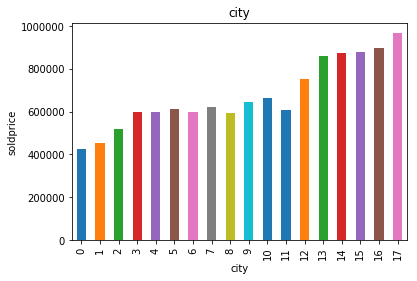

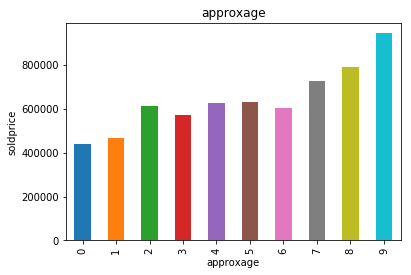

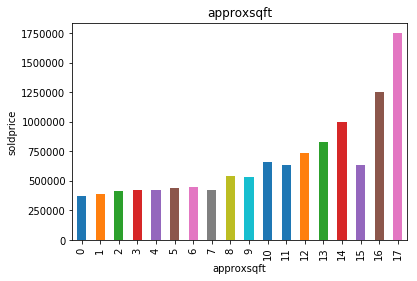

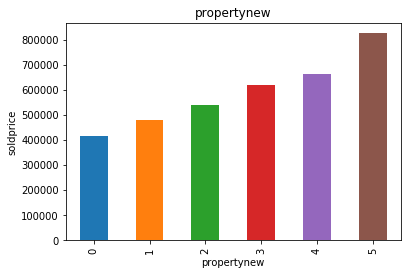

In [162]:
# let me show you what I mean by monotonic relationship between labels and target
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['soldprice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('soldprice')
    plt.show()
    
for var in cat_vars:
    analyse_vars(X_train, var)

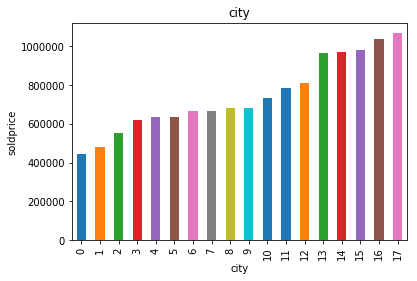

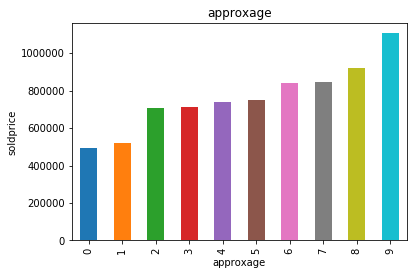

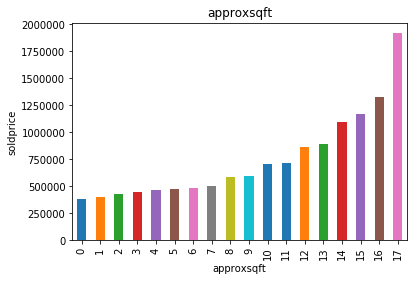

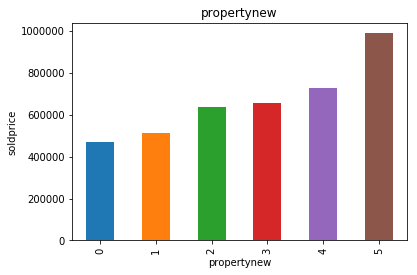

In [163]:
# let me show you what I mean by monotonic relationship between labels and target
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['soldprice'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('soldprice')
    plt.show()
    
for var in cat_vars:
    analyse_vars(X_train, var)

In [164]:
# make a list of the numerical variables that contain missing values
vars_with_na = [var for var in df.columns if X_train[var].dtypes!='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 3))

city 0.0
approxage 0.0
approxsqft 0.0
propertynew 0.0
bedroomstotal 0.0
kitchens 0.0
washrooms 0.0
maintenancefee 0.0
soldprice 0.0
latitude 0.908
longitude 0.908
ageoflisting 0.0


In [165]:
# make a list of the numerical variables that contain missing values
vars_with_na = [var for var in df.columns if X_train[var].dtypes=='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 3))

postcode 0.0
province 0.0
area 0.0
community 0.0
type 0.0


In [166]:
cont_vars=['maintenancefee','soldprice']

## Outlier Removal( Continious Numerical Variables have Skewed Distributions)

In [167]:
IQR = df.maintenancefee.quantile(0.75) - df.maintenancefee.quantile(0.25)

upper_fence = X_train.maintenancefee.quantile(0.75) + (IQR * 3)
lower_fence = X_train.maintenancefee.quantile(0.25) - (IQR * 3)


upper_fence, lower_fence

(1277.7024999999999, -318.1624999999999)

In [168]:
X_train.maintenancefee.max(),X_train.maintenancefee.min()

(76472.0, 100.0)

In [169]:
len(X_train[X_train['maintenancefee'] > upper_fence]) / len(X_train)

0.005183240575448913

In [170]:
X_train.drop(X_train[X_train.maintenancefee>upper_fence].index,axis=0).head(2)

,postcode,province,city,area,community,type,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,soldprice,latitude,longitude,ageoflisting,kitchens_na,washrooms_na,maintenancefee_na,soldprice_na
230282,M1P5C7,Ontario,11,Toronto,Dorset Park,Sale,5,3,0,2,1.0,2.0,618.70,460000.0,NaN,NaN,66.0,0,0,0,0
397363,L4N2G8,Ontario,0,Simcoe,Ardagh,Sale,7,13,5,5,1.0,4.0,479.77,675000.0,NaN,NaN,12.0,0,0,1,0


In [171]:
X_train.shape

(238075, 21)

In [172]:
#X_train[X_train.maintenancefee<lower_fence].shape[0]/np.float(X_train.shape[0])

In [173]:
IQR = df.maintenancefee.quantile(0.75) - df.maintenancefee.quantile(0.25)

upper_fence = X_train.soldprice.quantile(0.75) + (IQR * 3)
lower_fence = X_train.soldprice.quantile(0.25) - (IQR * 3)


upper_fence, lower_fence

(875797.9325, 443202.0675)

In [174]:
X_train.soldprice.max(),X_train.soldprice.min()

(22000000.0, 1.0)

In [175]:
X_train[X_train.soldprice>upper_fence].shape[0]/np.float(X_train.shape[0])
#>15% , can't be removed as these are not outliers

0.24840911477475586

In [176]:
X_train[X_train.soldprice<lower_fence].shape[0]/np.float(X_train.shape[0])
#>15% , can't be removed as these are not outliers

0.24980363330883126

In [177]:
X_train[X_train.soldprice<2].shape[0]/len(X_train)

8.40071406069516e-06

In [178]:
dp_loss= df.shape[0]-X_train.shape[0]-X_test.shape[0]

In [179]:
dp_loss

0

## Log transfporming soldprice

In [180]:
    X_train['soldprice'] = np.log(X_train['soldprice'])
    X_test['soldprice']= np.log(X_test['soldprice'])

In [181]:
df[df.soldprice>1].index

Int64Index([    27,     33,     46,     95,    184,    190,    204,    210,
               233,    240,
            ...
            653151, 653152, 653153, 653156, 653158, 653159, 653161, 653165,
            653166, 653167],
           dtype='int64', length=264516)

# Feature Scaling

In [182]:
len(X_train.columns)

21

In [183]:
X_train.columns

Index(['postcode', 'province', 'city', 'area', 'community', 'type',
       'approxage', 'approxsqft', 'propertynew', 'bedroomstotal', 'kitchens',
       'washrooms', 'maintenancefee', 'soldprice', 'latitude', 'longitude',
       'ageoflisting', 'kitchens_na', 'washrooms_na', 'maintenancefee_na',
       'soldprice_na'],
      dtype='object')

In [184]:
#X_train.drop(['entrydate','solddate'],axis=1,inplace=True).columns

In [185]:
info_vars=['postcode', 'province','area','community','type','latitude','longitude','soldprice']

In [186]:
train_vars = [var for var in X_train.columns if var not in info_vars]
len(train_vars)

13

In [187]:
train_vars

['city',
 'approxage',
 'approxsqft',
 'propertynew',
 'bedroomstotal',
 'kitchens',
 'washrooms',
 'maintenancefee',
 'ageoflisting',
 'kitchens_na',
 'washrooms_na',
 'maintenancefee_na',
 'soldprice_na']

In [188]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[train_vars]) #  fit  the scaler to the train set for later use

# transform the train and test set, and add on the Id and SalePrice variables
X_train = pd.concat([X_train[info_vars].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)],
                    axis=1)

X_test = pd.concat([X_test[info_vars].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[train_vars]), columns=train_vars)],
                    axis=1)

In [189]:
X_train.head()

,postcode,province,area,community,type,latitude,longitude,soldprice,city,approxage,approxsqft,propertynew,bedroomstotal,kitchens,washrooms,maintenancefee,ageoflisting,kitchens_na,washrooms_na,maintenancefee_na,soldprice_na
0,M1P5C7,Ontario,Toronto,Dorset Park,Sale,NaN,NaN,13.038982,0.647059,0.555556,0.176471,0.0,0.111111,0.111111,0.057143,0.006792,0.550000,0.0,0.0,0.0,0.0
1,L4N2G8,Ontario,Simcoe,Ardagh,Sale,NaN,NaN,13.422468,0.000000,0.777778,0.764706,1.0,0.277778,0.111111,0.114286,0.004973,0.100000,0.0,0.0,1.0,0.0
2,M9B0A4,Ontario,Toronto,Islington-City Centre West,Sale,NaN,NaN,13.021437,0.647059,0.555556,0.058824,0.0,0.111111,0.111111,0.028571,0.004290,0.041667,0.0,0.0,0.0,0.0
3,L6X0X9,Ontario,Peel,Credit Valley,Sale,NaN,NaN,13.507626,0.294118,0.333333,0.823529,1.0,0.222222,0.111111,0.085714,0.004973,0.658333,0.0,0.0,1.0,0.0
4,M5A3J3,Ontario,Toronto,Cabbagetown-South St. James Town,Sale,NaN,NaN,13.579788,0.647059,0.888889,0.470588,0.8,0.166667,0.111111,0.057143,0.004973,0.050000,0.0,0.0,1.0,0.0


In [190]:
# check absence of missing values
X_train.isnull().sum()

postcode                  0
province                  0
area                      0
community                 0
type                      0
latitude             216088
longitude            216088
soldprice                 0
city                      0
approxage                 0
approxsqft                0
propertynew               0
bedroomstotal             0
kitchens                  0
washrooms                 0
maintenancefee            0
ageoflisting              0
kitchens_na               0
washrooms_na              0
maintenancefee_na         0
soldprice_na              0
dtype: int64

In [191]:
# let's now save the train and test sets for the next notebook!

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

## Reference